# Predicting Credit Card Fraud

The goal for this analysis is to predict credit card fraud in the transactional data. I will be using tensorflow to build the predictive model, however, this is my first personal project with tensorflow, so I doubt that I am using it in an overly sophisticated way. If you have any advice/feedback on how to improve my neural network, that would be most welcomed. Thank you!

In [21]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [22]:
df = pd.read_csv("creditcard.csv")

In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The data is mostly transformed from its original form, for confidentiality reasons.

In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Let's see how time compares across fradulent and normal transactions.

In [26]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64

Normal
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


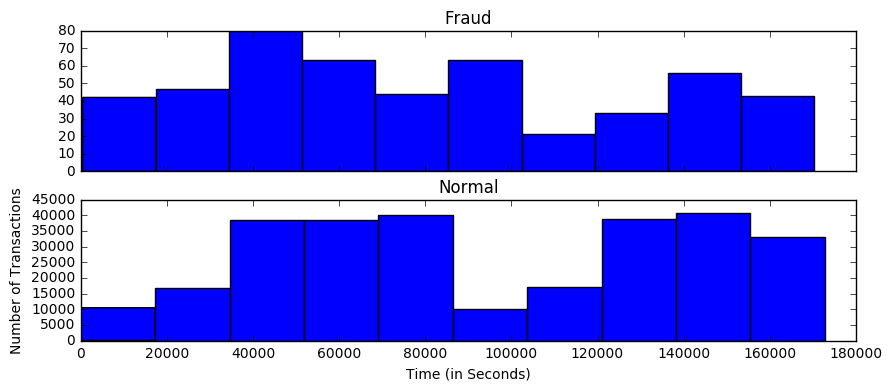

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.hist(df.Time[df.Class == 1])
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions.

Perhaps the amount is different between the two types.

In [28]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


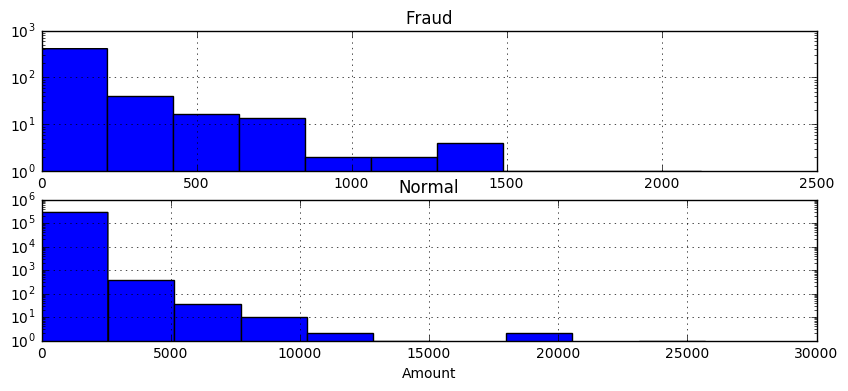

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(211)
plt.hist(df.Amount[df.Class == 1])
plt.yscale('log')
plt.title('Fraud')
plt.grid(True)

plt.subplot(212)
plt.hist(df.Amount[df.Class == 0])
plt.yscale('log')
plt.title('Normal')
plt.grid(True)

plt.xlabel("Amount")
plt.show()

Amount also looks very similar across both types of transactions. Let's try looking at these two features together.

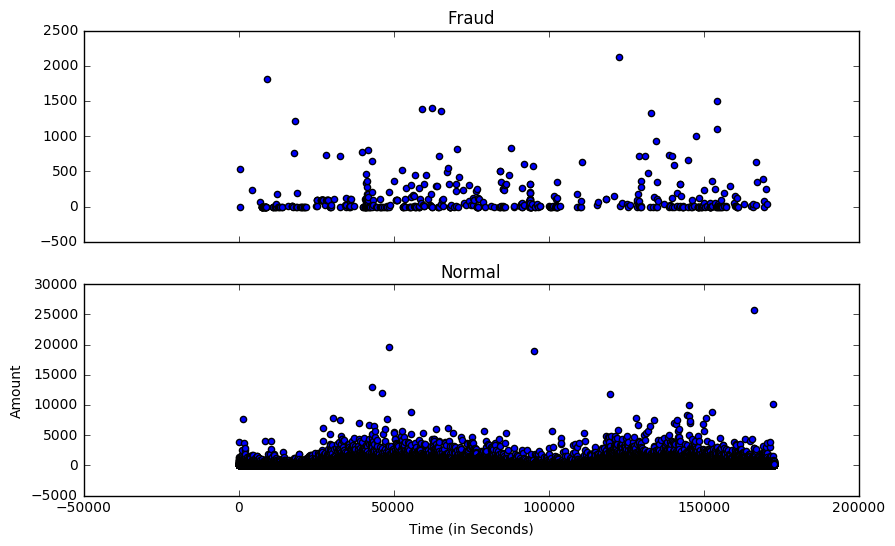

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Nothing useful here. I was hoping that we would be able to create a new feature or alter at least one of these features to help improve the model...I'm afraid that won't happen.

In [31]:
#Create a new feature for normal (non-fraudulent) transactions.
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [32]:
df = df.rename(columns={'Class': 'Fraud'})

In [33]:
#492 fraudulent transactions, 284,315 normal transactions.
#0.172% of transactions were fraud. 
print(df.Normal.value_counts())
print()
print(df.Fraud.value_counts())

1.0    284315
0.0       492
Name: Normal, dtype: int64

0    284315
1       492
Name: Fraud, dtype: int64


In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud,Normal
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1.0


In [35]:
#Create dataframes of only Fraud and Normal transactions
Fraud = df[df.Fraud == 1]
Normal = df[df.Normal == 1]

In [41]:
#Set X_train equal to half of the fraudulent transactions
X_train = Fraud[::2]
count_Frauds = len(X_train)

#Add 50,000 normal transactions to X_train
X_train = pd.concat([X_train, Normal.sample(n = 100000)], axis = 0)

#X_test contains all the transaction not in X_train
X_test = df.loc[~df.index.isin(X_train.index)]

In [42]:
#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [43]:
y_train = X_train.Fraud
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Fraud
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [44]:
X_train = X_train.drop(['Fraud','Normal'], axis = 1)
X_test = X_test.drop(['Fraud','Normal'], axis = 1)

In [45]:
#Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

100246
100246
184561
184561


In [46]:
'''
ratio will act as an equal weighting system for our model. Because we want to reduce the mean squared error between
our predicted and target values, we want the initial sums of our labels to be equal. ratio will multiply the Fraud 
values so that they equal the sum of the Normal values (each Normal value equals 1).
'''
ratio = len(X_train)/count_Frauds 

y_train.Fraud *= ratio
y_test.Fraud *= ratio

In [47]:
#Names of all of the features in X_train
features = X_train.columns.values

#Transform each feature so that it has a mean of 0 and standard deviation of 1; this helps with training the model.
for feature in features:
    mean, std = df[feature].mean(), df[feature].std()
    X_train.loc[:, feature] = (X_train[feature] - mean) / std
    X_test.loc[:, feature] = (X_test[feature] - mean) / std

## Train the Neural Net

In [48]:
inputX = X_train.as_matrix()
inputY = y_train.as_matrix()
inputX_test = X_test.as_matrix()
inputY_test = y_test.as_matrix()

In [49]:
#Multiplier maintains a fixed ratio of nodes between each layer
mulitplier = 1.5 

#Number of nodes in hidden layer 1
hidden_nodes1 = 15
hidden_nodes2 = round(hidden_nodes1 * mulitplier)
hidden_nodes3 = round(hidden_nodes2 * mulitplier)

#input
x = tf.placeholder(tf.float32, [None, 30]) #there are 30 inputs

#layer 1
W1 = tf.Variable(tf.zeros([30, hidden_nodes1]))
b1 = tf.Variable(tf.zeros([hidden_nodes1]))
y1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

#layer 2
W2 = tf.Variable(tf.zeros([hidden_nodes1, hidden_nodes2]))
b2 = tf.Variable(tf.zeros([hidden_nodes2]))
y2 = tf.nn.sigmoid(tf.matmul(y1, W2) + b2)

#layer 3
W3 = tf.Variable(tf.zeros([hidden_nodes2, hidden_nodes3])) 
b3 = tf.Variable(tf.zeros([hidden_nodes3]))
y3 = tf.nn.sigmoid(tf.matmul(y2, W3) + b3)

#layer 4
W4 = tf.Variable(tf.zeros([hidden_nodes3, 2])) 
b4 = tf.Variable(tf.zeros([2]))
y4 = tf.nn.softmax(tf.matmul(y3, W4) + b4)

#output
y = y4
y_ = tf.placeholder(tf.float32, [None, 2])

In [52]:
#Parameters
learning_rate = 0.0005
training_epochs = 20000
display_step = 100
n_samples = y_train.size

In [53]:
#Cost function: Mean squared error
cost = tf.reduce_sum(tf.pow(y_ - y, 2))/(2*n_samples)

#We will optimize our model via AdamOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#Correct prediction if the most likely value (Fraud or Normal) from softmax equal the target value
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [54]:
#Initialize variables and tensorflow session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [55]:
accuracy_summary = [] #Record accuracy values for plot
cost_summary = [] #Record cost values for plot

for i in range(training_epochs):  
    sess.run([optimizer], feed_dict={x: inputX, y_: inputY})
    
    # Display logs per epoch step
    if (i) % display_step == 0:
        train_accuracy, newCost = sess.run([accuracy, cost], feed_dict={x: inputX, y_: inputY})
        print ("Training step:", i,
               "Accuracy =", "{:.5f}".format(train_accuracy), 
               "Cost = ", "{:.5f}".format(newCost))
        accuracy_summary.append(train_accuracy)
        cost_summary.append(newCost)
        
print()
print ("Optimization Finished!")
training_accuracy = sess.run(accuracy, feed_dict={x: inputX, y_: inputY})
print ("Training Accuracy=", training_accuracy)
print()
testing_accuracy = sess.run(accuracy, feed_dict={x: inputX_test, y_: inputY_test})
print ("Testing Accuracy=", testing_accuracy)

Training step: 0 Accuracy = 0.00245 Cost =  101.75954
Training step: 100 Accuracy = 0.00245 Cost =  101.76028
Training step: 200 Accuracy = 0.00245 Cost =  101.76027
Training step: 300 Accuracy = 0.00245 Cost =  101.75819
Training step: 400 Accuracy = 0.57835 Cost =  101.62766
Training step: 500 Accuracy = 0.94385 Cost =  101.53892
Training step: 600 Accuracy = 0.95748 Cost =  101.47964
Training step: 700 Accuracy = 0.96217 Cost =  101.45449
Training step: 800 Accuracy = 0.96465 Cost =  101.43789
Training step: 900 Accuracy = 0.96894 Cost =  101.42831
Training step: 1000 Accuracy = 0.97259 Cost =  101.42081
Training step: 1100 Accuracy = 0.97428 Cost =  101.41568
Training step: 1200 Accuracy = 0.97551 Cost =  101.41166
Training step: 1300 Accuracy = 0.97677 Cost =  101.40855
Training step: 1400 Accuracy = 0.97751 Cost =  101.40623
Training step: 1500 Accuracy = 0.97815 Cost =  101.40434
Training step: 1600 Accuracy = 0.97881 Cost =  101.40277
Training step: 1700 Accuracy = 0.97966 Cost

KeyboardInterrupt: 

In [56]:
#Use to find testing accuracy if I interrupt the training before it is finished
predicted = tf.argmax(y, 1)
testing_accuracy, testing_predictions = sess.run([accuracy,predicted], feed_dict={x: inputX_test, y_: inputY_test })
print(testing_accuracy)

0.998445


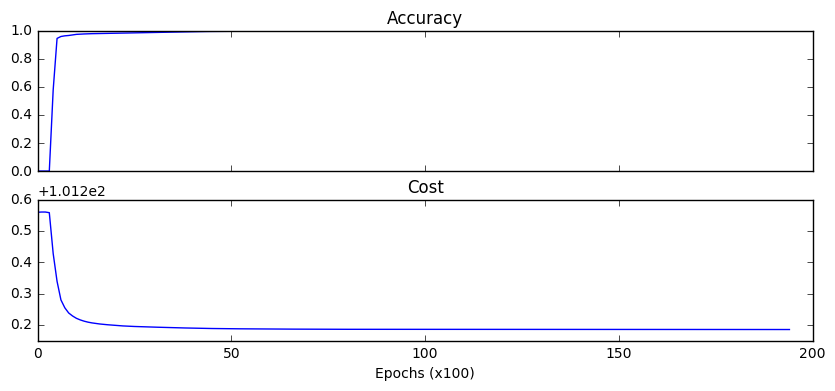

In [57]:
#Plot accuracy and cost summary

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

ax1.plot(accuracy_summary)
ax1.set_title('Accuracy')

ax2.plot(cost_summary)
ax2.set_title('Cost')

plt.xlabel('Epochs (x100)')
plt.show()

In [58]:
confusion_matrix(y_test.Normal, testing_predictions)

array([[   198,     48],
       [   239, 184076]])

To summarize the confusion matrix: 

Correct Fraud: 198

Incorrect Fraud: 48

Correct Normal: 184,076

Incorrect Normal: 239

# Summary

Although the neural network can detect most of the fraudulent transactions (80.0%), there are still some that got away. About 0.13% of normal transactions were classified as fraudulent, which can unfortunately add up very quickly given the large number of credit card transactions that occur each minute/hour/day. Nonetheless, I hope that you have learned something about tensorflow from this analysis and in you have any advice on how to improve the model, I would really appreciate that. Thank you!